In [ ]:
import osmnx as ox
import geopandas as gpd
import networkx as nx

In [ ]:
# Get paris city graph
G = ox.graph_from_place('Paris, France', network_type='drive')

In [ ]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [ ]:
point = [{
            "lon": 2.348707914352417,
            "lat": 48.85187911987305
        },{
            "lon": 2.3451132774353027,
            "lat": 48.85109329223633
        }]


# Get the nearest nodes from the point
orig_node = ox.nearest_nodes(G, point[0]['lon'], point[0]['lat'])
dest_node = ox.nearest_nodes(G, point[1]['lon'], point[1]['lat'])
print(orig_node, dest_node)
# Get route
route = ox.shortest_path(G, orig_node, dest_node, weight='travel_time')
route_nx = nx.shortest_path(G, orig_node, dest_node, weight='travel_time')
print(route)
print(route_nx)

In [ ]:

bbox = ox.utils_geo.bbox_from_point((point[0]['lat'],point[0]['lon'] ), dist=1000)
fig, ax = ox.plot_graph_route(G, route, 'r', bbox=bbox)

In [ ]:
# constrain plot to a bounding box
north, south, east, west = 48.85, 48.84, 2.35, 2.34

# to geopandas 
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)


In [ ]:
# plot map in geopandas
# gdf_nodes.explore()
# plot route in geopandas
gdf_edges.loc[route].explore()

In [ ]:
# Get the nearest node to the Eiffel Tower
eiffel_tower = (48.858093, 2.294694)
eiffel_tower_node = ox.nearest_nodes(G, eiffel_tower[1], eiffel_tower[0])
print(eiffel_tower_node)

In [ ]:
Krakow = ox.graph_from_place('Krakow, Poland', network_type='all')
print("Number of nodes: ", Krakow.number_of_nodes())
for node in Krakow.nodes(data=True):
    print(node)

In [ ]:
ox.plot_graph(Krakow)

In [ ]:
G.nodes[eiffel_tower_node]

In [ ]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)


In [ ]:
nodes = ['node/4074851973', 'node/409552086']

# Check if nodes are in the graph
nodes2 = [node for node in nodes if node in G.nodes]
print(nodes2)
print(len(G.nodes))

# Get the nearest nodes to a point

find = ox.distance.nearest_nodes(G, 2.3522, 48.8566, return_dist=True)

In [ ]:

# make route between two nodes
route = ox.shortest_path(G, nodes[0], nodes[1])

In [1]:
from Trips.trip import HumanTraveller

documenns = ['Data/UserPreferences/1_Marek_Kowalski_doc1.txt', 'Data/UserPreferences/1_Marek_Kowalski_doc2.txt',
             'Data/UserPreferences/1_Marek_Kowalski_doc3.txt']


traveller = HumanTraveller(name="John",
                          email='cos',
                           city="Paris",
                           documents_path=documenns,
                           api_key='5ae2e3f221c38a28845f05b6b7ed13224a4c8d8efa3af4074ca0eb98')

c:\Users\Jakub\anaconda3\envs\obrazy\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Jakub\anaconda3\envs\obrazy\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'acros', 'afterward', 'alway', 'ha', 'hi', 'le', 'nevertheles', 'perhap', 'seriou', 'thi', 'thu', 'u', 'wa', 'wherea'] not in stop_words.
  warnings.warn(


!!!! ['cinema', 'facility'] ['cultural', 'cinema', 'theatre', 'and', 'entertainment', 'interesting', 'place', 'restaurant', 'food', 'tourist', 'facility']


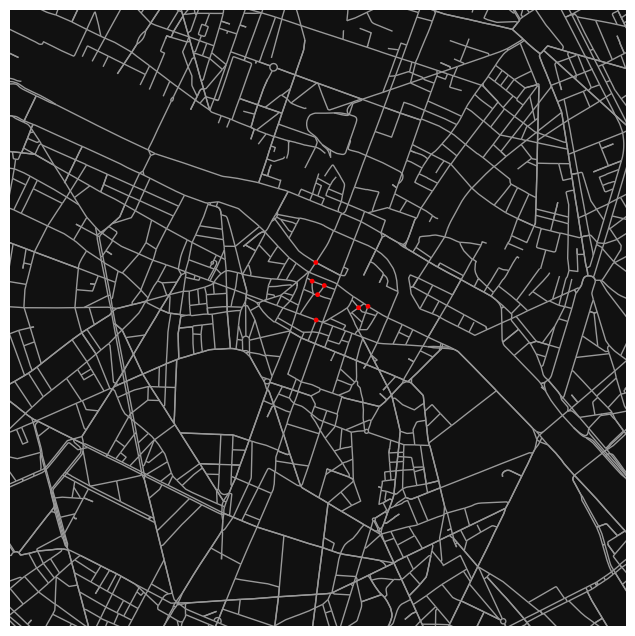

In [2]:
traveller.simple_graph()

In [3]:
traveller.simple_map().explore()